# EDA of Instacart Data

## Importing the libraries needed for this activity

In [4]:
%matplotlib inline
import os
import matplotlib
import numpy as np
import pandas as pd 
import sqlite3 as db
from sqlite3 import Error
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

## Define a function to create connection to sqlite database

In [6]:
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    try:
        conn = db.connect(db_file)
        return conn
    except Error as e:
        print(e)
        #conn.close()
    return None

In [7]:
def fetchDatbaseTables(database):
    conn = create_connection(database)
    cur = conn.cursor()
    cur.execute(''' SELECT name FROM sqlite_master ''')
    tables = cur.fetchall()
    conn.close()
    cur.close
    return tables

In [8]:
database = '..\\database\\InstacartData.db'
tables = fetchDatbaseTables(database)
print(tables)

[('aisles',), ('departments',), ('products',), ('orders',), ('order_products__prior',), ('order_products__train',)]


# Load data into a dataframe:

In [9]:
conn = create_connection(database)
aisles_df = pd.read_sql('select * from aisles', conn).drop_duplicates()
departments_df =  pd.read_sql('select * from departments', conn).drop_duplicates()
orders_df = pd.read_sql('select * from orders', conn).drop_duplicates()
products_df =  pd.read_sql('select * from products', conn).drop_duplicates()
orders_products_prior_df =  pd.read_sql('select * from order_products__prior', conn).drop_duplicates()
orders_products_train_df =  pd.read_sql('select * from order_products__train', conn).drop_duplicates()

In [49]:
instacart_dfs = [aisles_df, departments_df, products_df, orders_df, orders_products_prior_df, orders_products_train_df]
for df, name in zip(instacart_dfs,tables):
    print(name)
    print(df.shape)
    print(df.head())
    print(df.nunique())
    
    

('aisles',)
(134, 2)
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation
aisle_id    134
aisle       134
dtype: int64
('departments',)
(21, 2)
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol
department_id    21
department       21
dtype: int64
('products',)
(49688, 4)
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                    

# Exploring the orders dataset

In [9]:
print('Total unique Count:')
orders_df.nunique()

Total unique Count:


order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [65]:
orders_df.groupby(['user_id','eval_set']).size().reset_index().rename(columns={0:'Number Of orders'}).head(10)


,user_id,eval_set,Number Of orders
0,1,prior,10
1,1,train,1
2,2,prior,14
3,2,train,1
4,3,prior,12
5,3,test,1
6,4,prior,5
7,4,test,1
8,5,prior,4
9,5,train,1


In [11]:
num_orders_by_user = orders_df.groupby(['user_id']).size().reset_index().rename(columns={0:'Number_orders'})

In [10]:
# We can use the fivethirtyeight style with Matplotlib, which is a little bit nicer-looking than the standard style.
matplotlib.style.use('fivethirtyeight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025A310FA080>,
      dtype=object)

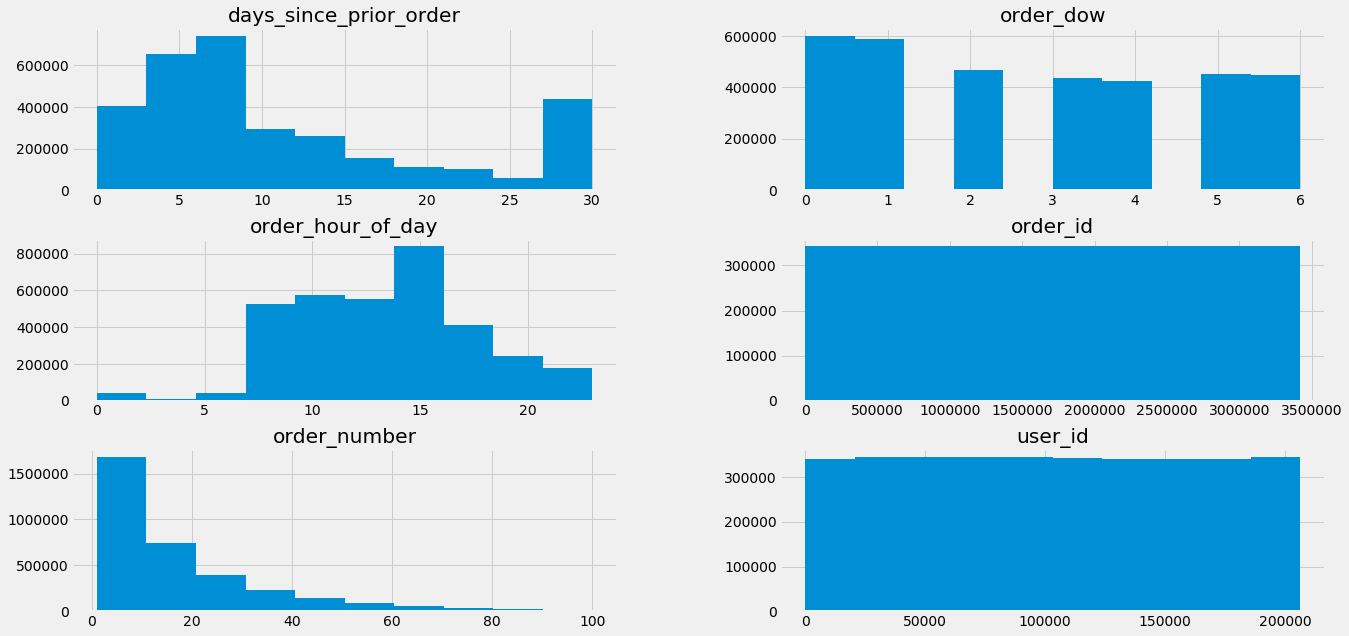

In [12]:
orders_df.hist(figsize=(20,10)) # Histogram for all features

#We know that the number of orders per customer is between 4 and 100 orders, 
#it will be interesting to see the distrubition of the order count across number of users

<IPython.core.display.Javascript object>


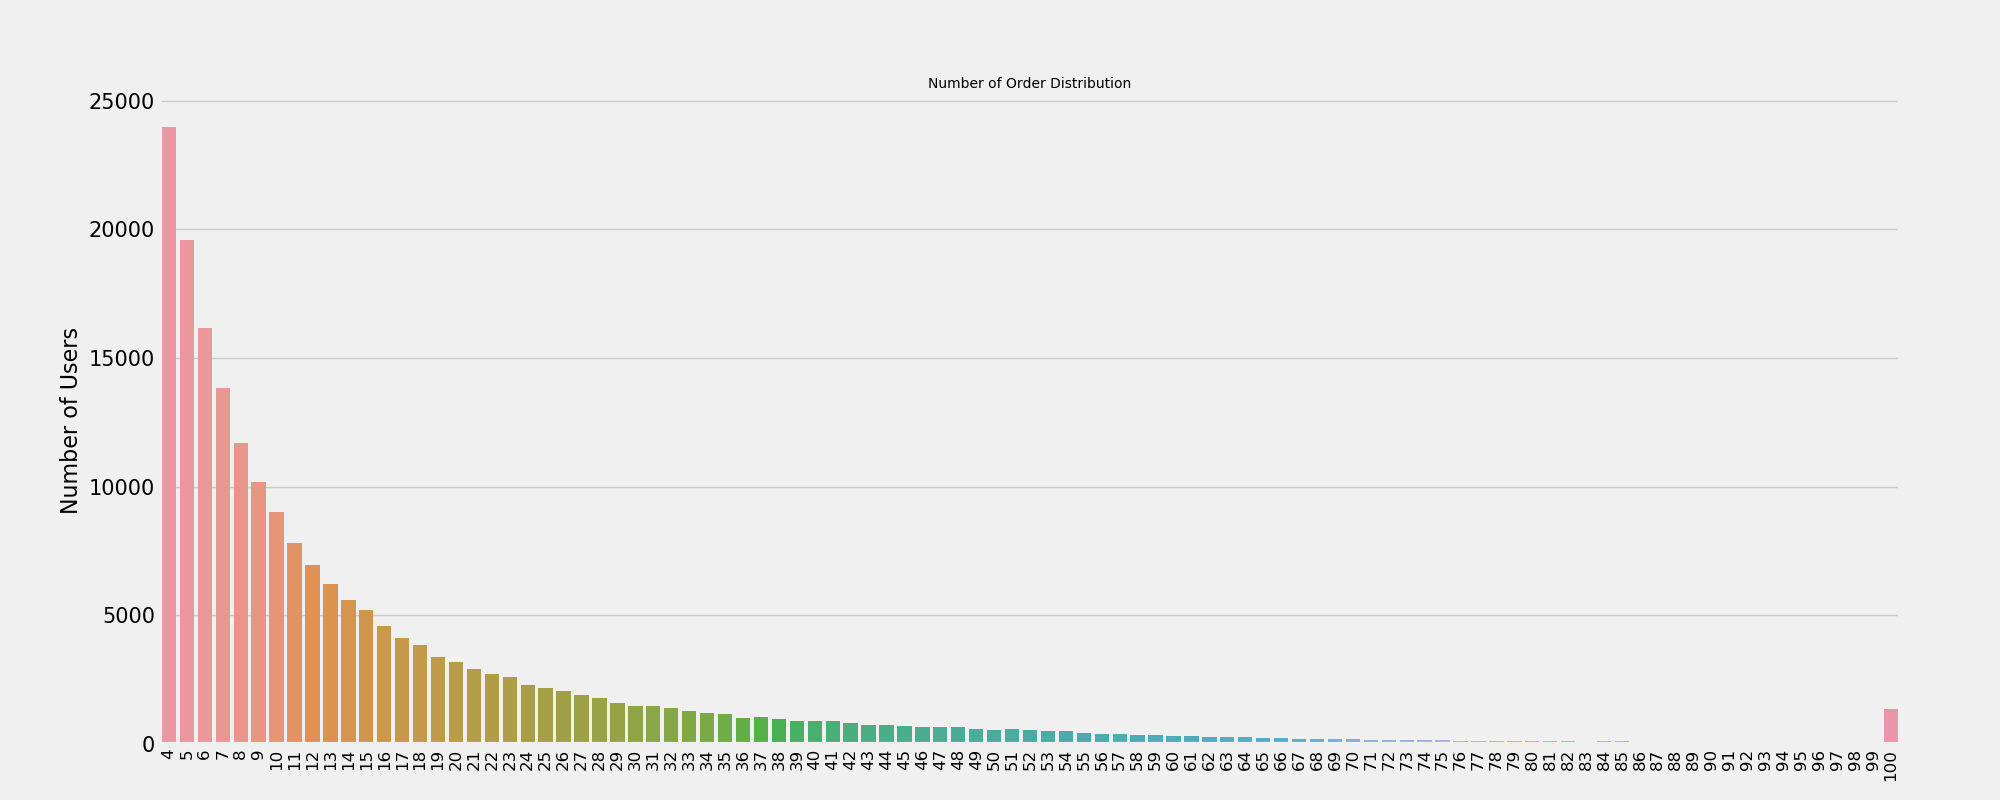

''

In [87]:
plt.figure(figsize=(20,8))
sns.countplot(x=num_orders_by_user.Number_orders)

plt.title("Distribution of order count per User", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12,rotation='vertical')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)
;

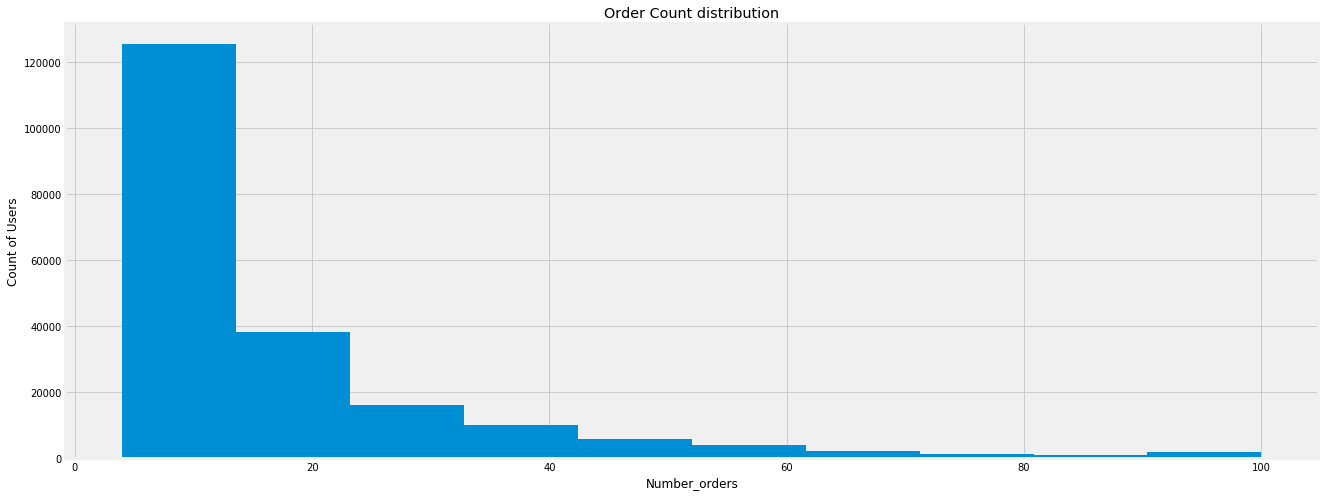

In [112]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.hist(num_orders_by_user['Number_orders'], bins = 10, range = (num_orders_by_user['Number_orders'].min(),num_orders_by_user['Number_orders'].max()))
plt.title('Order Count distribution')
plt.xlabel('Number_orders')
plt.ylabel('Count of Users')
plt.show()

Majority of users have between 4 and 10 orders in the dataset

In [13]:
orders_df.groupby('eval_set').size().reset_index().rename(columns={0:'Number Of orders'})

,eval_set,Number Of orders
0,prior,3214874
1,test,75000
2,train,131209


In [174]:
dow_list = [['Sunday', 1], ['Monday', 2], ['Tuesday', 3], ['Wednesday', 4], ['Thursday', 5], ['Friday', 6], ['Saturday', 0]]
dow_df = pd.DataFrame(dow_list, columns = ['DOW_name', 'order_dow'])


In [184]:
orders_df = pd.merge(orders_df, dow_df, on='order_dow')

In [196]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,DOW_name
1330573,2295261,1,prior,9,1,16,0.0,Sunday
1330572,3108588,1,prior,8,1,14,14.0,Sunday
1330571,550135,1,prior,7,1,9,20.0,Sunday
1,3367565,1,prior,6,2,7,19.0,Monday
0,2539329,1,prior,1,2,8,NaN,Monday


In [197]:
orders_df.sort_values(by=['order_dow'], ascending=True,inplace=True)

''

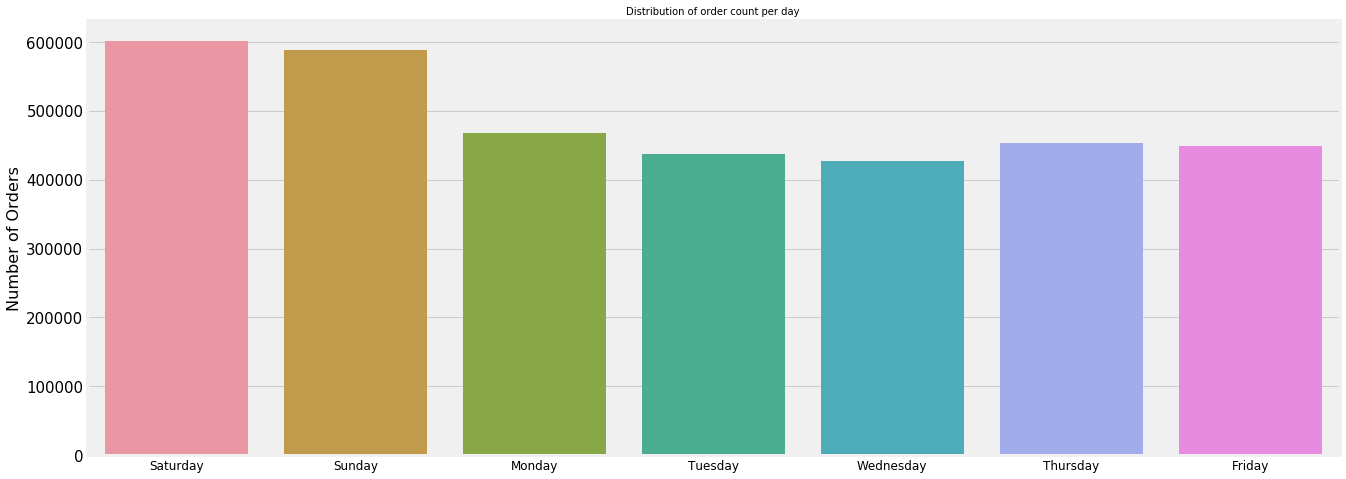

In [198]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.DOW_name)

plt.title("Distribution of order count per day", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)
;

it seems that the weekend has the most orders placed by users. 

In [3]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.order_hour_of_day)

plt.title("Distribution of order count per hour", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Orders', fontsize=16)
plt.yticks(fontsize=15)
;

NameError: name 'plt' is not defined

In [42]:
orders_df['user_total_orders'] = (
    orders_df.sort_values(by=['user_id', 'order_number'],ascending=False)
    .groupby('user_id',as_index=False)
    ['order_number'].nth(0)
)

In [51]:
orders_count = orders_df.groupby('user_id').size().reset_index().rename(columns={0:'user_total_orders_count'})

In [52]:
orders = pd.merge(orders_df, orders_count, on='user_id')

In [53]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_total_orders_count
0,2539329,1,prior,1,2,8,NaN,NaN,11
1,2398795,1,prior,2,3,7,15.0,NaN,11
2,473747,1,prior,3,3,12,21.0,NaN,11
3,2254736,1,prior,4,4,7,29.0,NaN,11
4,431534,1,prior,5,4,15,28.0,NaN,11


# Exploring order_products data set

In [199]:
orders_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [212]:
orders_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


To get the total order_products data, let's concatenate these 2 datasets

In [224]:
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df]) 

In [227]:
order_products_total_df.head()

,order_id,product_id,add_to_cart_order,reordered,is_reordred
0,2,33120,1,1,Reordered
1,2,28985,2,1,Reordered
2,2,45918,4,1,Reordered
3,2,17794,6,1,Reordered
4,2,40141,7,1,Reordered


In [208]:
reordered_df = pd.DataFrame([['Reordered', 1], ['Not-Reordered', 0]], columns = ['is_reordred','reordered'])

In [226]:
order_products_total_df = pd.merge(order_products_total_df, reordered_df, on='reordered')

In [228]:
order_products_total_df.groupby('is_reordred').size().reset_index().rename(columns={0:'Number Of products'})

,is_reordred,Number Of products
0,Not-Reordered,13863746
1,Reordered,19955360


In [213]:
orders_products_train_df.groupby('reordered').size().reset_index().rename(columns={0:'Number Of products'})

,reordered,Number Of products
0,0,555793
1,1,828824


''

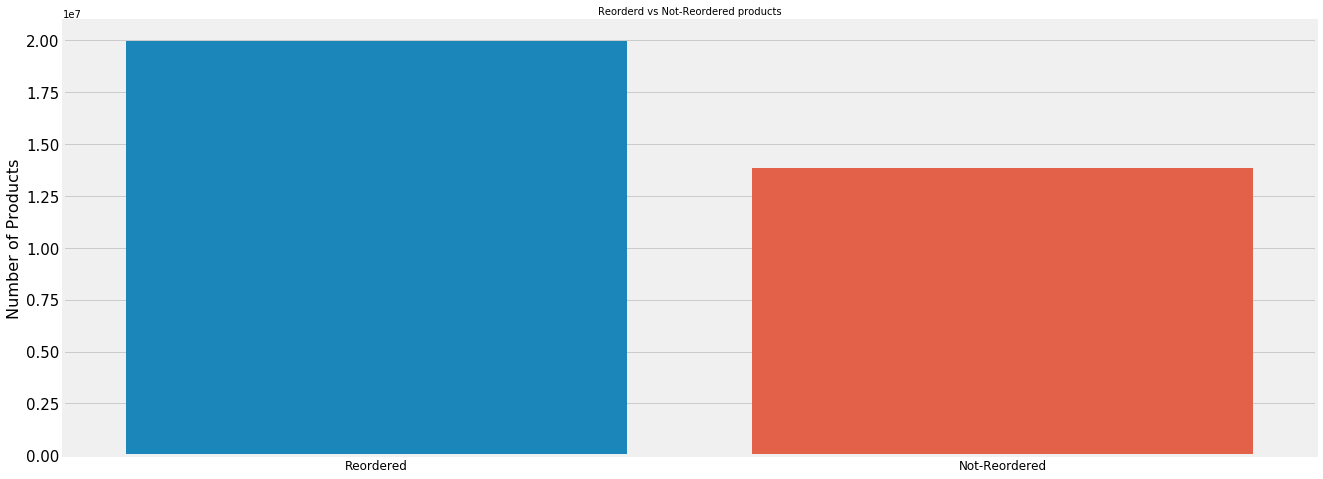

In [229]:
plt.figure(figsize=(20,8))
sns.countplot(x=order_products_total_df.is_reordred)

plt.title("Reorderd vs Not-Reordered products", fontsize=10)
plt.xlabel('', fontsize=16)
plt.xticks(fontsize=12)
plt.ylabel('Number of Products', fontsize=16)
plt.yticks(fontsize=15)
;

let's see what products are most reordered. but First need first to merge the products dataframe with order_products dataframe to get the product names

In [230]:
order_products_total_df = pd.merge(order_products_total_df, products_df, on='product_id')

In [255]:
order_products_total_df[(order_products_total_df.product_name == 'Banana')][order_products_total_df.reordered ==0].count()

C:\Users\mohamed.h.osman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


order_id             76125
product_id           76125
add_to_cart_order    76125
reordered            76125
is_reordred          76125
product_name         76125
aisle_id             76125
department_id        76125
dtype: int64

In [243]:
products_order_freq = order_products_total_df.groupby(['product_name','department_id', 'aisle_id']).size().reset_index().rename(columns={0:'order_count'})
products_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)

In [256]:
#Top most ordered products are produce
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count
3677,Banana,4,24,491291
3472,Bag of Organic Bananas,4,24,394930
31923,Organic Strawberries,4,24,275577
28843,Organic Baby Spinach,4,123,251705
30300,Organic Hass Avocado,4,24,220877
28807,Organic Avocado,4,24,184224
22415,Large Lemon,4,24,160792
42908,Strawberries,4,24,149445
23422,Limes,4,24,146660
32481,Organic Whole Milk,16,84,142813


Looks like the most ordered products are fruits and vegetables. let's merge the department and aisle dataframes to have a better picture

In [269]:
order_products_total_df = pd.merge(order_products_total_df, aisles_df, on='aisle_id')
order_products_total_df = pd.merge(order_products_total_df, departments_df, on='department_id')
products_order_freq.head(10)

In [271]:
order_products_total_df.head(10)

,order_id,product_id,add_to_cart_order,reordered,is_reordred,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
1,327,33120,5,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
2,390,33120,28,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
3,537,33120,2,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
4,582,33120,7,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
5,608,33120,5,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
6,623,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
7,689,33120,4,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
8,726,33120,3,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs
9,771,33120,29,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs


In [260]:
products_order_freq.head(10)

,product_name,department_id,aisle_id,order_count,aisle,department
0,Banana,4,24,491291,fresh fruits,produce
1,Bag of Organic Bananas,4,24,394930,fresh fruits,produce
2,Organic Strawberries,4,24,275577,fresh fruits,produce
3,Organic Hass Avocado,4,24,220877,fresh fruits,produce
4,Organic Avocado,4,24,184224,fresh fruits,produce
5,Large Lemon,4,24,160792,fresh fruits,produce
6,Strawberries,4,24,149445,fresh fruits,produce
7,Limes,4,24,146660,fresh fruits,produce
8,Organic Fuji Apple,4,24,92889,fresh fruits,produce
9,Organic Lemon,4,24,91251,fresh fruits,produce


In [283]:
department_order_freq = order_products_total_df.groupby(['department','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
aisle_order_freq = order_products_total_df.groupby(['aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})


In [284]:
department_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
department_order_freq.head(21)

,department,is_reordred,order_count
39,produce,Reordered,6432596
15,dairy eggs,Reordered,3773723
38,produce,Not-Reordered,3455782
14,dairy eggs,Not-Reordered,1857344
7,beverages,Reordered,1832952
41,snacks,Reordered,1727075
40,snacks,Not-Reordered,1279337
32,pantry,Not-Reordered,1277020
21,frozen,Reordered,1268058
20,frozen,Not-Reordered,1068800


In [285]:
aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
aisle_order_freq.head(21)

,aisle,is_reordred,order_count
101,fresh fruits,Reordered,2726251
107,fresh vegetables,Reordered,2123540
106,fresh vegetables,Not-Reordered,1445090
197,packaged vegetables fruits,Reordered,1178700
100,fresh fruits,Not-Reordered,1066410
267,yogurt,Reordered,1034957
167,milk,Reordered,722128
196,packaged vegetables fruits,Not-Reordered,665106
263,water seltzer sparkling water,Reordered,640988
187,packaged cheese,Reordered,598280


In [282]:
dep_aisle_order_freq = order_products_total_df.groupby(['department','aisle','is_reordred']).size().reset_index().rename(columns={0:'order_count'})
dep_aisle_order_freq.sort_values(by=['order_count'], ascending=False,inplace=True)
dep_aisle_order_freq.head(21)

,department,aisle,is_reordred,order_count
237,produce,fresh fruits,Reordered,2726251
241,produce,fresh vegetables,Reordered,2123540
240,produce,fresh vegetables,Not-Reordered,1445090
245,produce,packaged vegetables fruits,Reordered,1178700
236,produce,fresh fruits,Not-Reordered,1066410
85,dairy eggs,yogurt,Reordered,1034957
73,dairy eggs,milk,Reordered,722128
244,produce,packaged vegetables fruits,Not-Reordered,665106
43,beverages,water seltzer sparkling water,Reordered,640988
77,dairy eggs,packaged cheese,Reordered,598280


''

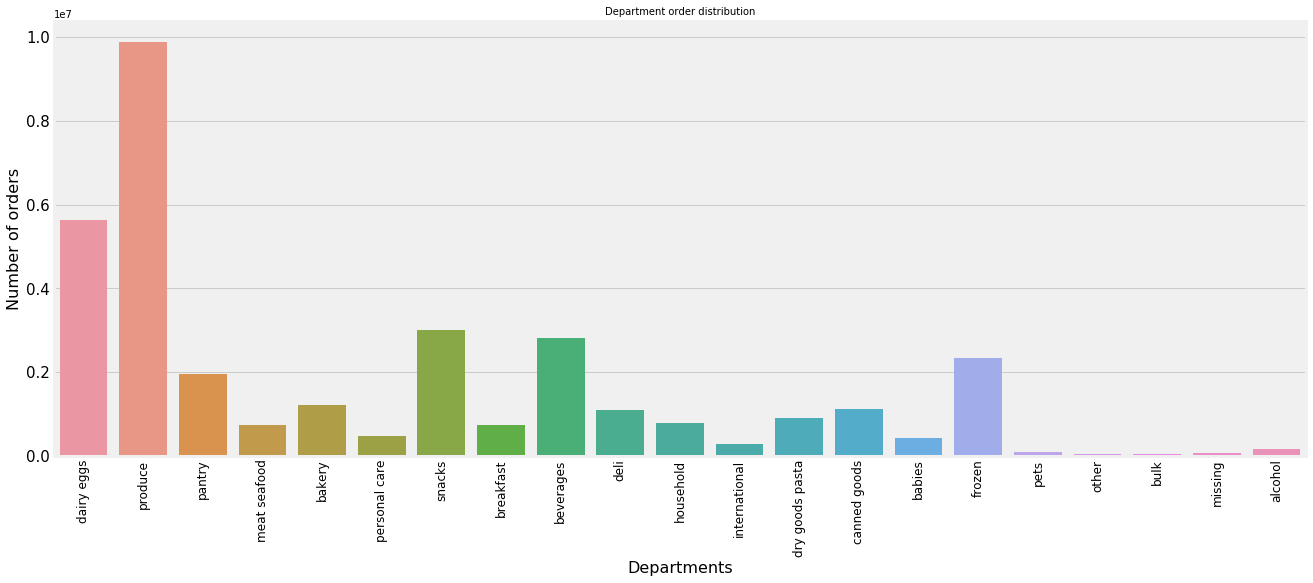

In [281]:
plt.figure(figsize=(20,8))
sns.countplot(x=order_products_total_df.department)

plt.title("Department order distribution", fontsize=10)
plt.xlabel('Departments', fontsize=16)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.ylabel('Number of orders', fontsize=16)
plt.yticks(fontsize=15)
;

In [286]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')

In [306]:
order_products_total_df.head(100)

,order_id,product_id,add_to_cart_order,reordered,is_reordred,product_name,aisle_id,department_id,aisle,department,user_id_x,eval_set_x,order_number_x,order_dow_x,order_hour_of_day_x,days_since_prior_order_x,DOW_name_x
0,2,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs,202279,prior,3,5,9,8.0,Thursday
1,2,28985,2,1,Reordered,Michigan Organic Kale,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,Thursday
2,2,17794,6,1,Reordered,Carrots,83,4,fresh vegetables,produce,202279,prior,3,5,9,8.0,Thursday
3,2,43668,9,0,Not-Reordered,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,202279,prior,3,5,9,8.0,Thursday
4,2,45918,4,1,Reordered,Coconut Butter,19,13,oils vinegars,pantry,202279,prior,3,5,9,8.0,Thursday
5,2,40141,7,1,Reordered,Original Unflavored Gelatine Mix,105,13,doughs gelatins bake mixes,pantry,202279,prior,3,5,9,8.0,Thursday
6,2,1819,8,1,Reordered,All Natural No Stir Creamy Almond Butter,88,13,spreads,pantry,202279,prior,3,5,9,8.0,Thursday
7,2,30035,5,0,Not-Reordered,Natural Sweetener,17,13,baking ingredients,pantry,202279,prior,3,5,9,8.0,Thursday
8,2,9327,3,0,Not-Reordered,Garlic Powder,104,13,spices seasonings,pantry,202279,prior,3,5,9,8.0,Thursday
9,327,33120,5,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs,58707,prior,21,6,9,8.0,Friday


In [288]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')
order_products_total_df.head()

,order_id,product_id,add_to_cart_order,reordered,is_reordred,product_name,aisle_id,department_id,aisle,department,...,order_hour_of_day_x,days_since_prior_order_x,DOW_name_x,user_id_y,eval_set_y,order_number_y,order_dow_y,order_hour_of_day_y,days_since_prior_order_y,DOW_name_y
0,2,33120,1,1,Reordered,Organic Egg Whites,86,16,eggs,dairy eggs,...,9,8.0,Thursday,202279,prior,3,5,9,8.0,Thursday
1,2,28985,2,1,Reordered,Michigan Organic Kale,83,4,fresh vegetables,produce,...,9,8.0,Thursday,202279,prior,3,5,9,8.0,Thursday
2,2,17794,6,1,Reordered,Carrots,83,4,fresh vegetables,produce,...,9,8.0,Thursday,202279,prior,3,5,9,8.0,Thursday
3,2,43668,9,0,Not-Reordered,Classic Blend Cole Slaw,123,4,packaged vegetables fruits,produce,...,9,8.0,Thursday,202279,prior,3,5,9,8.0,Thursday
4,2,45918,4,1,Reordered,Coconut Butter,19,13,oils vinegars,pantry,...,9,8.0,Thursday,202279,prior,3,5,9,8.0,Thursday


In [302]:
col_y = ['user_id_y', 'eval_set_y', 'order_number_y', 'order_dow_y', 'order_hour_of_day_y', 'days_since_prior_order_y' , 'DOW_name_y']
order_products_total_df = order_products_total_df.drop(col_y, axis =1)

In [291]:
order_hour_traffic = order_products_total_df.groupby(['department','order_hour_of_day_x']).size().reset_index().rename(columns={0:'order_count'})

,department,order_hour_of_day_x,order_count
0,alcohol,0,534
1,alcohol,1,350
2,alcohol,2,260
3,alcohol,3,196
4,alcohol,4,200


Text(0, 0.5, 'Order Count')

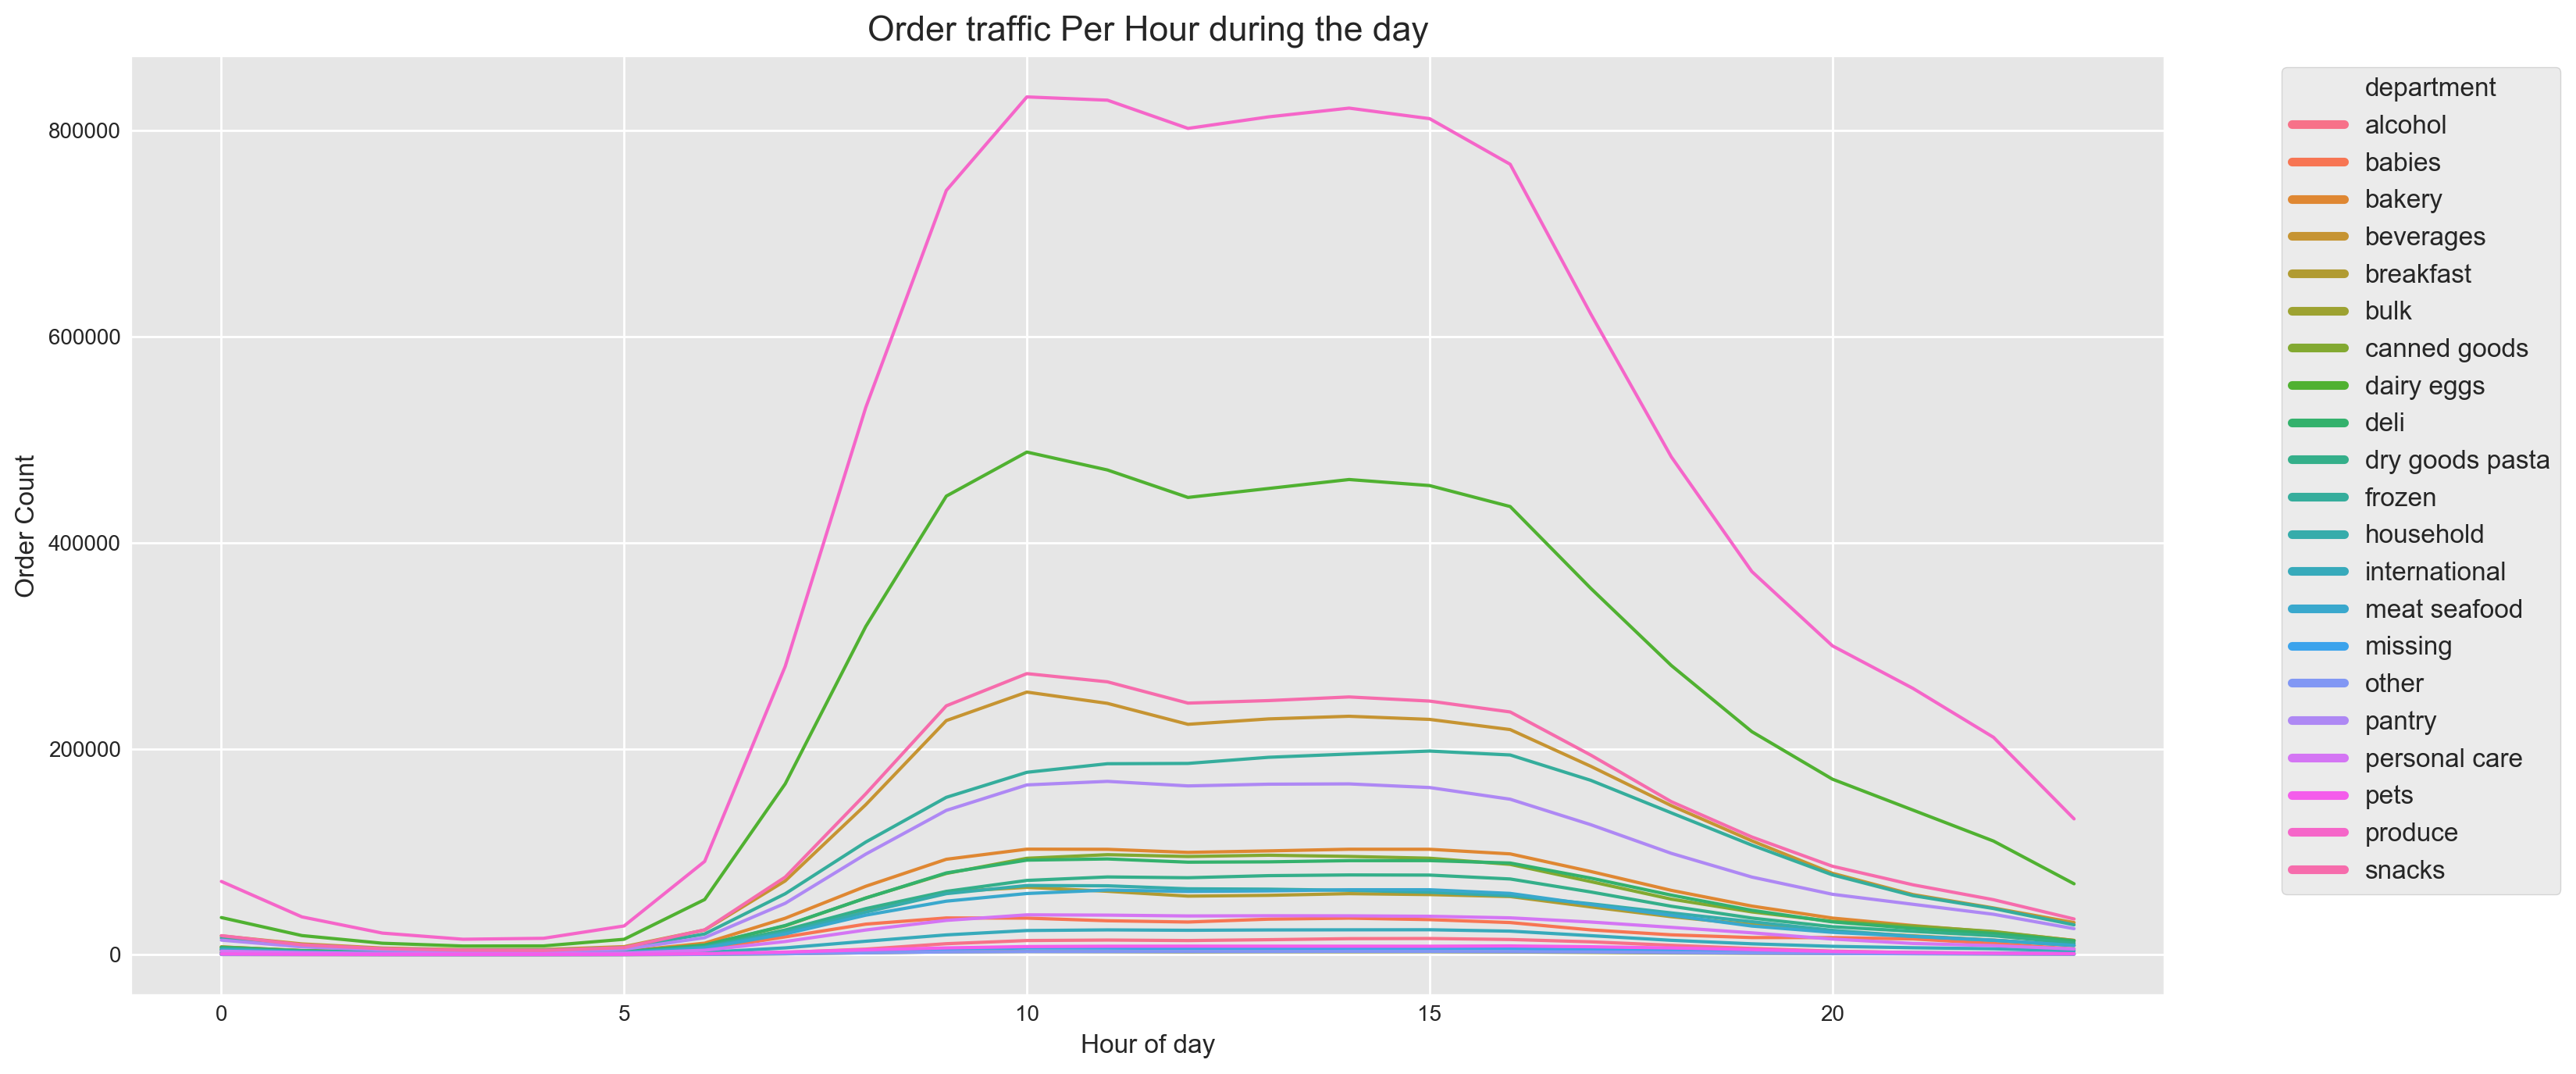

In [300]:
# create plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(15, 8), dpi=200)

# plot data
sns.lineplot(x='order_hour_of_day_x', y='order_count',  
             hue='department', linewidth=1.5, data=order_hour_traffic)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('Order traffic Per Hour during the day', fontsize=16)
plt.xlabel('Hour of day', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

In [56]:
orders_products_train_df =  pd.read_sql('select * from order_products__train', conn).drop_duplicates()

In [58]:
orders_products_train_df = pd.merge(orders_products_train_df, orders_df, on='order_id')
orders_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders
0,1,49302,1,1,112108,train,4,4,10,9.0,4.0
1,1,11109,2,1,112108,train,4,4,10,9.0,4.0
2,1,10246,3,0,112108,train,4,4,10,9.0,4.0
3,1,49683,4,0,112108,train,4,4,10,9.0,4.0
4,1,43633,5,1,112108,train,4,4,10,9.0,4.0


In [59]:

# now we want to know if the products that are in orders_prior 
# ended up in the baskets in orders_train (= our target 'yes'[1] or 'no'[0])

# accumulate orders_train to create carts from last order
train_carts = (orders_products_train_df.groupby('user_id',as_index=False) #  group by users
                                      .agg({'product_id':(lambda x: list(x))}) # create a list of the products in the cart
                                      .rename(columns={'product_id':'user_cart_current_contents'}))

In [60]:
train_carts.head(10)

,user_id,user_cart_current_contents
0,1,"[196, 25133, 38928, 26405, 39657, 10258, 13032..."
1,2,"[22963, 7963, 16589, 32792, 41787, 22825, 1364..."
2,5,"[15349, 19057, 16185, 21413, 20843, 20114, 482..."
3,7,"[12053, 47272, 37999, 13198, 43967, 40852, 176..."
4,8,"[15937, 5539, 10960, 23165, 22247, 4853, 27104..."
5,9,"[27555, 42347, 27596, 8834, 26604, 12075, 8467..."
6,10,"[29650, 48720, 24654, 10177]"
7,13,"[27435, 27086, 4210, 47078, 19934]"
8,14,"[11042, 32115, 28601, 29615, 15869, 37434, 380..."
9,17,"[18534, 1217, 12720, 16797, 43352, 4374]"


In [ ]:
train_carts = (order_products_train_df.groupby('user_id',as_index=False)
                                      .agg({'product_id':(lambda x: set(x))})
                                      .rename(columns={'product_id':'latest_cart'}))df_X = df_X.merge(train_carts, on='user_id')
df_X['in_cart'] = (df_X.apply(lambda row: row['product_id'] in row['latest_cart'], axis=1).astype(int))

# Exploring User features

In [97]:
orders_df[orders_df.user_id == 206209]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_days_since_order
3421082,272231,206209,train,14,6,14,30.0,14.0,NaN
3421081,2977660,206209,prior,13,1,12,7.0,NaN,30.0
3421080,626363,206209,prior,12,1,12,18.0,NaN,37.0
3421079,1854736,206209,prior,11,4,10,30.0,NaN,55.0
3421078,2266710,206209,prior,10,5,18,29.0,NaN,85.0
3421077,2558525,206209,prior,9,4,15,22.0,NaN,114.0
3421076,2129269,206209,prior,8,3,17,22.0,NaN,136.0
3421075,550836,206209,prior,7,2,13,9.0,NaN,158.0
3421074,3186442,206209,prior,6,0,16,3.0,NaN,167.0
3421073,2307371,206209,prior,5,4,15,3.0,NaN,170.0


In [95]:
orders_df['user_days_since_order'] = (orders_df.sort_values(by=['user_id','order_number'], ascending=False)
                .groupby(['user_id'])
                ['days_since_prior_order'].apply(lambda x: x.cumsum())).shift(1)

''

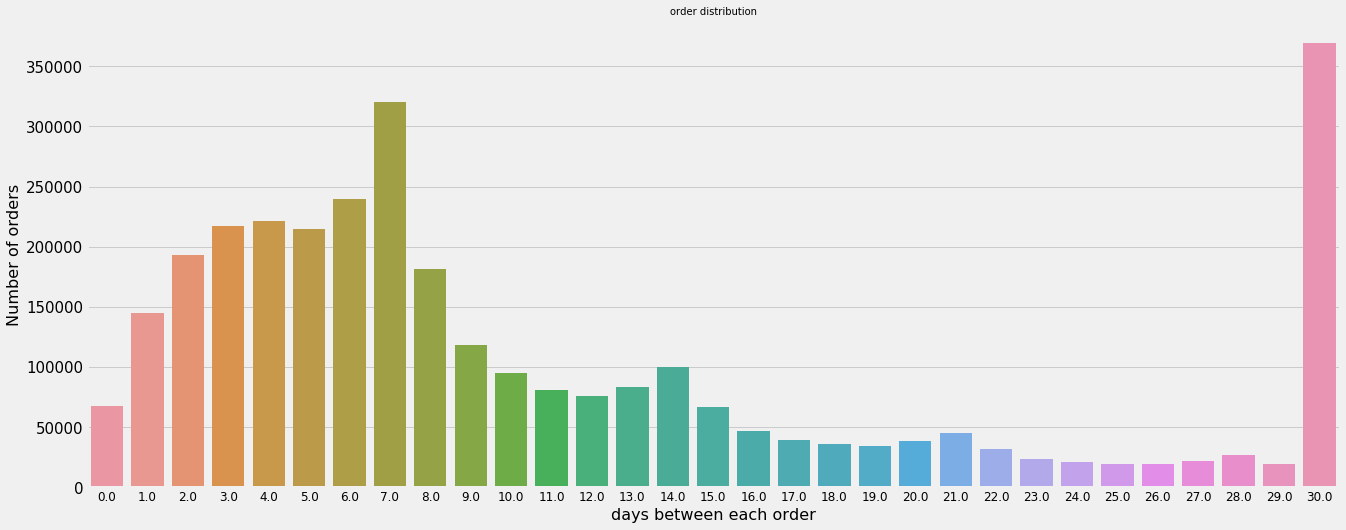

In [197]:
plt.figure(figsize=(20,8))
sns.countplot(x=orders_df.days_since_prior_order)
plt.title("order distribution", fontsize=10)
plt.xlabel('days between each order', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of orders', fontsize=16)
plt.yticks(fontsize=15)
;

In [198]:
orders_df['days_since_prior_order'].max()

30.0

In [199]:
orders_df.groupby('days_since_prior_order').size().reset_index().rename(columns={0:'order_count'}).head()

,days_since_prior_order,order_count
0,0.0,67755
1,1.0,145247
2,2.0,193206
3,3.0,217005
4,4.0,221696


In [3]:
user_df = orders_df.groupby(['user_id']).size().reset_index().rename(columns={0:'user_total_orders_count'})

NameError: name 'orders_df' is not defined

In [2]:
user_df.head()

NameError: name 'user_df' is not defined

In [81]:
user_df['days_between_second_and_first_orders'] = list(orders_df[orders_df.order_number ==2]['days_since_prior_order'])

In [206]:
user_df[user_df['days_between_second_and_first_orders'] <30].count()

user_id                                 158370
user_total_orders_count                 158370
days_between_second_and_first_orders    158370
days_between_third_and_second_orders    158370
days_between_fourth_and_third_orders    158370
days_activities_period                  158370
user_days_between_orders_mean           158370
user_days_between_orders_average        158370
dtype: int64

In [92]:
user_df['days_between_third_and_second_orders'] = list(orders_df[orders_df.order_number ==3]['days_since_prior_order'])
user_df['days_between_third_and_second_orders'].max()

30.0

In [ ]:
user_df['days_between_fourth_and_third_orders'] = list(orders_df[orders_df.order_number ==4]['days_since_prior_order'])
user_df['days_between_fourth_and_third_orders'].max()

In [164]:
user_df['days_activities_period'] = list(orders_df.groupby(['user_id'])['days_since_prior_order'].apply(lambda x: x.sum()))c

In [187]:
user_df['user_days_between_orders_average'] = user_df['days_activities_period']/user_df['user_total_orders_count']
user_df.user_days_between_orders_average = user_df.user_days_between_orders_average.astype(int)

''

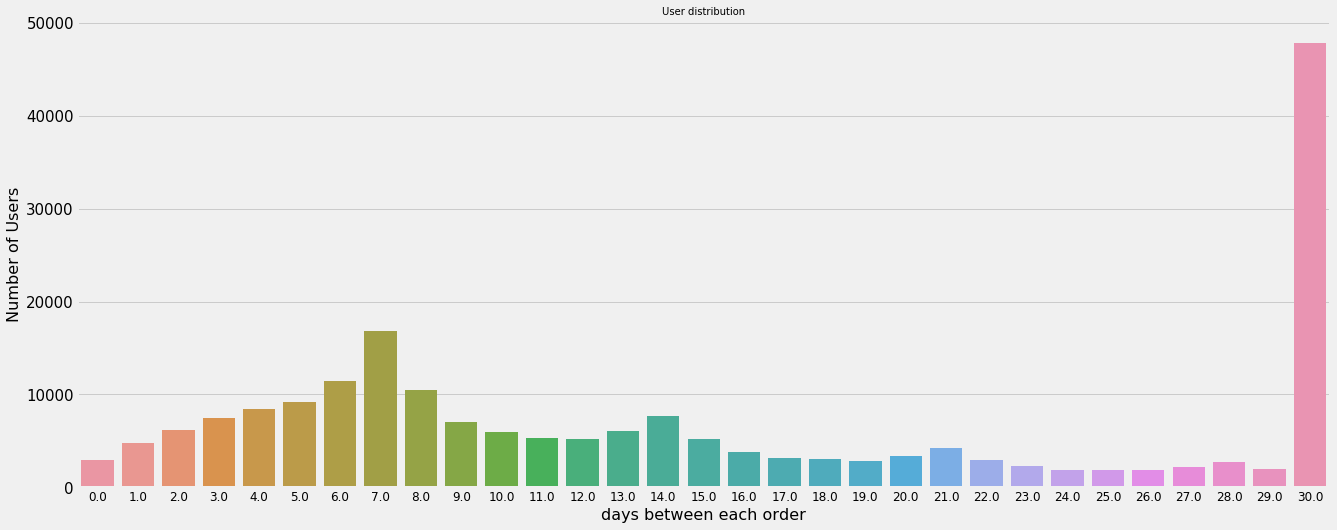

In [207]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.days_between_second_and_first_orders)
plt.title("User distribution", fontsize=10)
plt.xlabel('days between each order', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)
;

In [209]:
user_df['reorder_before_30_days'] = np.where(user_df.days_between_second_and_first_orders == 30, 0, 1)

In [265]:
user_df['reorder_within_11_days'] = np.where(user_df.days_between_second_and_first_orders > 11, 0, 1)

In [258]:
user_df['reorder_biweekly'] = np.where(user_df.days_between_second_and_first_orders > 14, 0, 1)

''

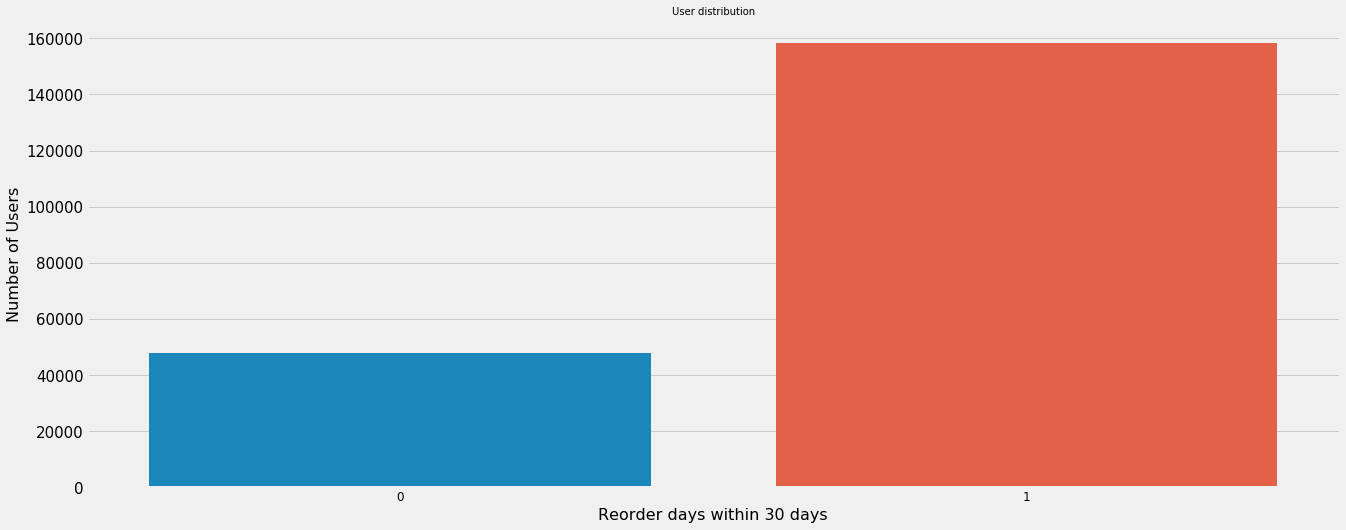

In [232]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.reorder_before_30_days)
plt.title("User distribution", fontsize=10)
plt.xlabel('Reorder days within 30 days', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)
;

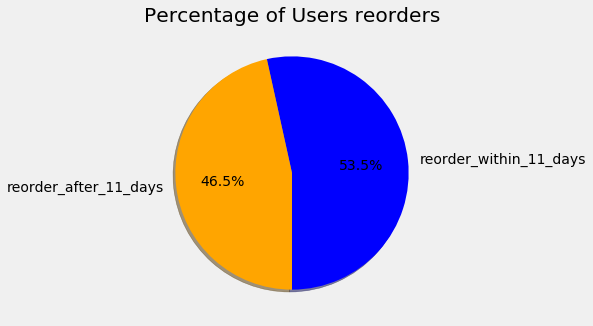

In [268]:
# Data to plot
sizes = user_df['reorder_within_11_days'].value_counts(sort = True)
colors = ["blue","orange"] 
plt.rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['reorder_within_11_days', 'reorder_after_11_days'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Users reorders')
plt.show()

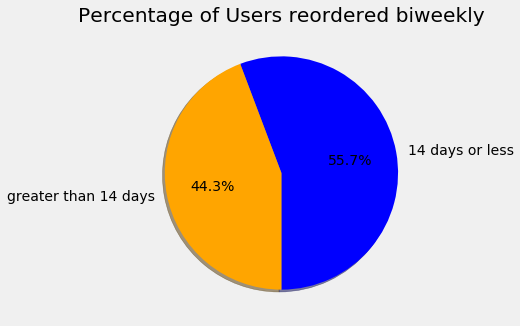

In [264]:
# Data to plot
sizes = user_df['reorder_biweekly'].value_counts(sort = True)
colors = ["blue","orange"] 
plt.rcParams['figure.figsize'] = 5,5
# Plot
plt.pie(sizes, explode=None, labels=['14 days or less', 'greater than 14 days'], colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.title('Percentage of Users reordered biweekly')
plt.show()

''

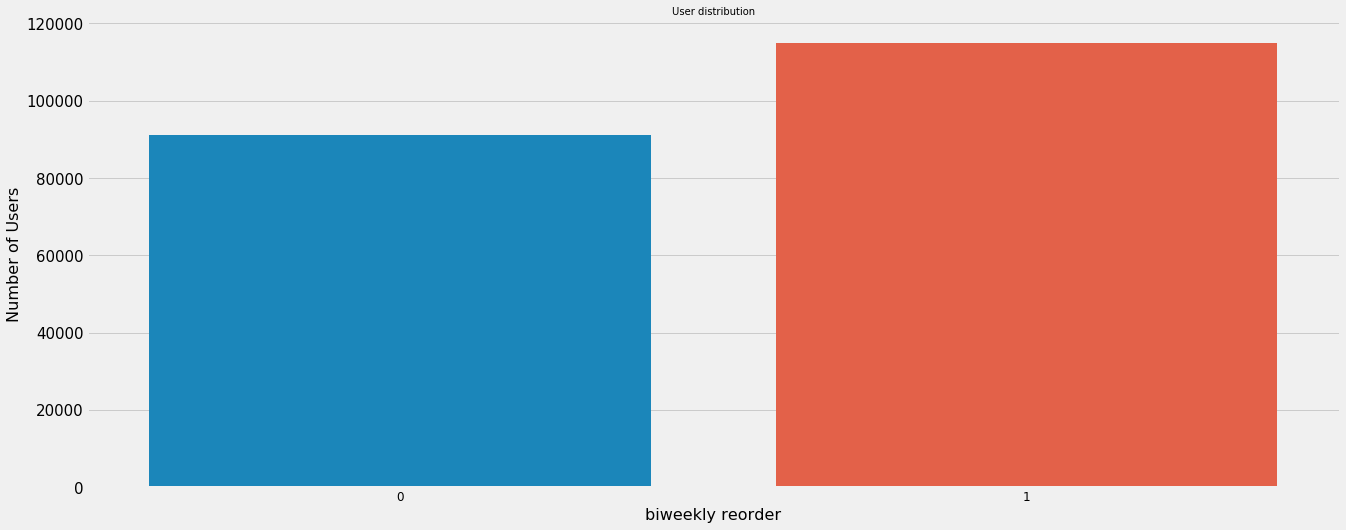

In [263]:
plt.figure(figsize=(20,8))
sns.countplot(x=user_df.reorder_biweekly)
plt.title("User distribution", fontsize=10)
plt.xlabel('biweekly reorder', fontsize=16)
plt.xticks(fontsize=12, rotation = 'horizontal')
plt.ylabel('Number of Users', fontsize=16)
plt.yticks(fontsize=15)
;

In [257]:
user_df[user_df.days_between_second_and_first_orders > 14].count()

user_id                                 91256
user_total_orders_count                 91256
days_between_second_and_first_orders    91256
days_between_third_and_second_orders    91256
days_between_fourth_and_third_orders    91256
days_activities_period                  91256
user_days_between_orders_mean           91256
user_days_between_orders_average        91256
reorder_before_30_days                  91256
reorder_before_7_days                   91256
reorder_greater_7_days                  91256
dtype: int64

In [236]:
orders_products_prior_df =  pd.read_sql('select * from order_products__prior', conn).drop_duplicates()
orders_products_train_df =  pd.read_sql('select * from order_products__train', conn).drop_duplicates()
#orders_products_test_df =  pd.read_sql('select * from order_products__test', conn).drop_duplicates()
order_products_total_df = pd.concat([orders_products_prior_df, orders_products_train_df ]) 

In [238]:
order_products_total_df = pd.merge(order_products_total_df, orders_df, on='order_id')

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,user_total_orders,user_days_since_order
0,2,33120,1,1,202279,prior,3,5,9,8.0,NaN,153.0
1,2,28985,2,1,202279,prior,3,5,9,8.0,NaN,153.0
2,2,9327,3,0,202279,prior,3,5,9,8.0,NaN,153.0
3,2,45918,4,1,202279,prior,3,5,9,8.0,NaN,153.0
4,2,30035,5,0,202279,prior,3,5,9,8.0,NaN,153.0


In [293]:
user_cart_contents = order_products_total_df[(order_products_total_df.order_number ==1) | (order_products_total_df.order_number ==2)].groupby(['user_id','order_number']).agg({'product_id':(lambda x:tuple(x))}).rename(columns={'product_id':'user_cart_contents'}).head()

In [294]:
user_df['user_cart_size'] = [len(x) for x in user_df['user_cart_contents']]

In [335]:
user_df['first_order_cart_content'] = list(order_products_total_df[order_products_total_df.order_number ==1].groupby(['user_id'])['product_id'].apply(lambda x:tuple(x)))

In [338]:
user_df['second_order_cart_content'] = list(order_products_total_df[order_products_total_df.order_number ==2].groupby(['user_id'])['product_id'].apply(lambda x:tuple(x)))

In [339]:
user_df['first_order_cart_size'] = [len(x) for x in user_df['first_order_cart_content']]
user_df['second_order_cart_size'] = [len(x) for x in user_df['second_order_cart_content']]

In [ ]:
# create plot
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(25, 10), dpi=200)

# plot data
sns.lineplot(x='user_total_orders_count', y='user_cumsum',  
             linewidth=1.5, data=user_df)

# set legend outside the plot             
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, fontsize=12)
plt.title('User_Order Count distribution', fontsize=16)
plt.xlabel('User count', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

In [ ]:
user_df['user_cumsum'].plot()